# **Customer propensity to purchase**


# **Introduction**

Aim is to build a Machine Learning model that predicts the customer's probability of purchase using historical data. Each website has a lot of visitors every day but not all of them make a purchase. Instead of spending money to target such visitors using digital marketing like social media platforms, it makes sense to optimize this activity by targeting real valuable prospects who are more likely to make a purchase.<br><br>


## About Dataset

For simplicity we just keep subset of dataset. Columns are as below:

'UserID' – Unique Identifier for each customer

'basket_add_detail' – A binary variable indicating if the customer added an item to the basket from the product detail page

'promo_banner_click' – A binary variable indicating if the customer clicked on any promotional banners

'sign_in' – Another binary variable, indicating if the customer signed into our website

'returning_user' – Again, a binary variable indicating if the customer is a returning visitor to our website

'saw_homepage' – A binary variable indicating if the customer saw the homepage of the website

'ordered' – Our target variable. A binary variable indicating if the customer placed an order

## Import libraries we required

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import data

In [24]:
data = pd.read_csv("training_sample.csv")

In [25]:
data.head()

,UserID,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
0,a720-6b732349-a720-4862-bd21-644732,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,a0c0-6b73247c-a0c0-4bd9-8baa-797356,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,86a8-6b735c67-86a8-407b-ba24-333055,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
3,6a3d-6b736346-6a3d-4085-934b-396834,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,0
4,b74a-6b737717-b74a-45c3-8c6a-421140,0,1,0,1,0,0,0,0,1,...,0,0,0,1,0,0,1,0,1,1


In [26]:
data.describe()

,basket_icon_click,basket_add_list,basket_add_detail,sort_by,image_picker,account_page_click,promo_banner_click,detail_wishlist_add,list_size_dropdown,closed_minibasket_click,...,saw_sizecharts,saw_delivery,saw_account_upgrade,saw_homepage,device_mobile,device_computer,device_tablet,returning_user,loc_uk,ordered
count,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,...,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000,455401.000000
mean,0.099150,0.074521,0.112916,0.036849,0.026735,0.003570,0.016208,0.003511,0.230362,0.017277,...,0.000389,0.005542,0.001096,0.290024,0.680706,0.194220,0.128364,0.534915,0.933224,0.041926
std,0.298864,0.262617,0.316490,0.188391,0.161307,0.059647,0.126274,0.059151,0.421065,0.130302,...,0.019711,0.074241,0.033084,0.453773,0.466204,0.395599,0.334495,0.498780,0.249634,0.200420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data Preprocessing

### Checking the data

In [27]:
data.isna().sum()

UserID                     0
basket_icon_click          0
basket_add_list            0
basket_add_detail          0
sort_by                    0
image_picker               0
account_page_click         0
promo_banner_click         0
detail_wishlist_add        0
list_size_dropdown         0
closed_minibasket_click    0
checked_delivery_detail    0
checked_returns_detail     0
sign_in                    0
saw_checkout               0
saw_sizecharts             0
saw_delivery               0
saw_account_upgrade        0
saw_homepage               0
device_mobile              0
device_computer            0
device_tablet              0
returning_user             0
loc_uk                     0
ordered                    0
dtype: int64

from above, we can see there is no nan values in the data set

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455401 entries, 0 to 455400
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   UserID                   455401 non-null  object
 1   basket_icon_click        455401 non-null  int64 
 2   basket_add_list          455401 non-null  int64 
 3   basket_add_detail        455401 non-null  int64 
 4   sort_by                  455401 non-null  int64 
 5   image_picker             455401 non-null  int64 
 6   account_page_click       455401 non-null  int64 
 7   promo_banner_click       455401 non-null  int64 
 8   detail_wishlist_add      455401 non-null  int64 
 9   list_size_dropdown       455401 non-null  int64 
 10  closed_minibasket_click  455401 non-null  int64 
 11  checked_delivery_detail  455401 non-null  int64 
 12  checked_returns_detail   455401 non-null  int64 
 13  sign_in                  455401 non-null  int64 
 14  saw_checkout        

In [29]:
data.groupby('ordered').ordered.count()

ordered
0    436308
1     19093
Name: ordered, dtype: int64

Above we can see that the dataset is highly imbalanced so the prediction will be biased. 

To solve this problem, we can use undersampling. Undersampling is a technique to balance uneven datasets by keeping all of the data in the minority class and decreasing the size of the majority class.

In [30]:
data_balanced = data.groupby('ordered').apply(lambda x: x.sample(19093)).reset_index(drop=True)
data = data_balanced.sample(frac = 1)
data.groupby('ordered').ordered.count()

ordered
0    19093
1    19093
Name: ordered, dtype: int64

In [31]:
X = data[['basket_add_detail', 'promo_banner_click', 'sign_in', 'saw_homepage', 'returning_user']]
y = data['ordered']

## Feature selection

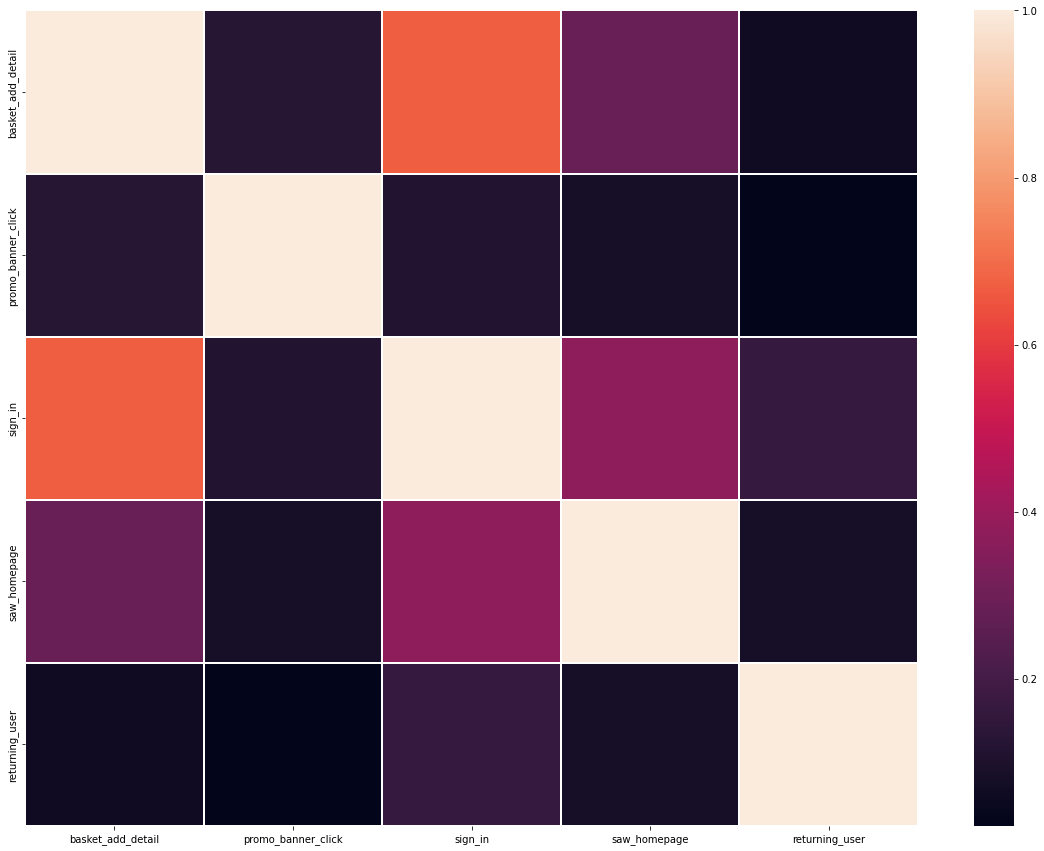

In [32]:
plt.figure(figsize=(20,15))
sns.heatmap(X.corr(),linewidth=2)
plt.show()

In [33]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [34]:
corr_features = correlation(X, 0.7)
len(set(corr_features))


0

In [35]:
corr_features

set()

In [36]:
X = X.drop(corr_features,axis=1)
X

,basket_add_detail,promo_banner_click,sign_in,saw_homepage,returning_user
4817,0,0,0,0,1
20146,0,0,1,1,1
35621,1,0,1,1,1
34816,0,0,1,1,1
11855,0,0,0,0,0
...,...,...,...,...,...
13461,0,0,0,0,1
29476,1,0,1,1,0
15028,1,0,0,0,1
3305,0,0,0,1,1


## Exploratory Data Analysis

How many users have purchased

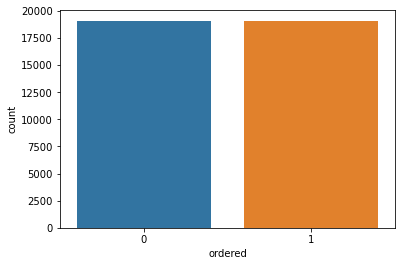

In [37]:
# 
ax = sns.countplot(data=data,x="ordered")
plt.show()

In [38]:
dataframe=data

### Model creation

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [40]:
print('Total no. of samples: Training and Testing dataset separately!')
print('X_train:', np.shape(X_train))
print('y_train:', np.shape(y_train))
print('X_test:', np.shape(X_test))
print('y_test:', np.shape(y_test))

Total no. of samples: Training and Testing dataset separately!
X_train: (30548, 5)
y_train: (30548,)
X_test: (7638, 5)
y_test: (7638,)


In [41]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 1]
 ...
 [0 0]
 [0 0]
 [0 0]]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### Metric Evaluation

[[3621  161]
 [ 222 3634]]


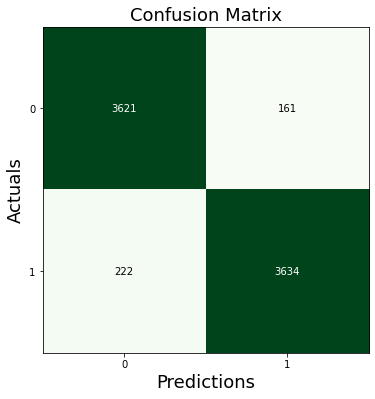

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [45]:
logreg=accuracy_score(y_test,y_pred)
rocreg=roc_auc_score(y_test, y_pred)
print('Accuracy : ',logreg,'\nROC Score : ',rocreg)

Accuracy :  0.9498559832416863 
ROC Score :  0.9499286585727106


In [46]:
import sklearn.metrics as metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3782
           1       0.96      0.94      0.95      3856

    accuracy                           0.95      7638
   macro avg       0.95      0.95      0.95      7638
weighted avg       0.95      0.95      0.95      7638



### Hyper tuning

In [48]:
from sklearn.model_selection import GridSearchCV
parameters_lr = [{'penalty':['l1','l2'],'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}]
grid_search_lr = GridSearchCV(estimator = classifier,
                           param_grid = parameters_lr,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search_lr.fit(X_train, y_train)
best_accuracy_lr = grid_search_lr.best_score_
best_paramaeter_lr = grid_search_lr.best_params_  
print("Best Accuracy of LR: {:.2f} %".format(best_accuracy_lr.mean()*100))
print("Best Parameter of LR:", best_paramaeter_lr)

Best Accuracy of LR: 97.23 %
Best Parameter of LR: {'C': 0.001, 'penalty': 'l2'}


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
Val

By using above parameter we get 97% accuracy

##  Testing

In [49]:
classifierhyp = LogisticRegression(C=0.001,penalty='l2')
classifierhyp.fit(X_train,y_train)

LogisticRegression(C=0.001)

In [50]:
y_pred=classifierhyp.predict(X_test)

#evaluate the model fit
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.9719821942916994

[[3589  193]
 [  21 3835]]


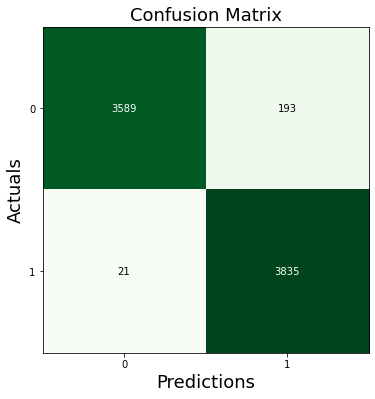

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [52]:
#save the pickle file to be loaded in the streamlit app
import pickle
with open("propensity_model.pkl", 'wb') as pfile:
    pickle.dump(classifierhyp, pfile)

In [53]:
X_test.shape

(7638, 5)